In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Position_Salaries.csv")

In [5]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
X = data.iloc[:,1:2].values

In [7]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [8]:
y = data.iloc[:,-1].values

In [9]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
X_train

array([[ 5],
       [10],
       [ 2],
       [ 7],
       [ 8],
       [ 4],
       [ 1],
       [ 6]], dtype=int64)

In [13]:
y_train

array([ 110000, 1000000,   50000,  200000,  300000,   80000,   45000,
        150000], dtype=int64)

In [14]:
X_test,y_test

(array([[3],
        [9]], dtype=int64),
 array([ 60000, 500000], dtype=int64))

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc_X = StandardScaler()

In [17]:
X = sc_X.fit_transform(X)

In [18]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [19]:
sc_Y = StandardScaler()

In [20]:
Y = sc_Y.fit_transform(y.reshape(-1, 1))

In [21]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [22]:
from sklearn.svm import SVR

In [23]:
regressor = SVR(kernel='rbf')

In [24]:
regressor.fit(X,Y)

C:\Users\SHAHIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [25]:
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))

In [26]:
y_pred

array([-0.27861589])

In [27]:
y_pred = sc_Y.inverse_transform(y_pred.reshape(-1,1))

In [28]:
y_pred

array([[170370.0204065]])

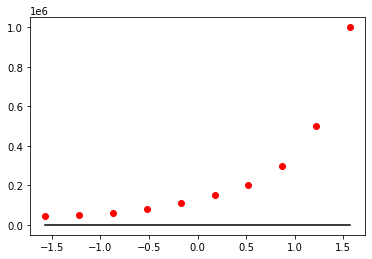

In [29]:
plt.scatter(X,y,c = 'red')
plt.plot(X,regressor.predict(X), c ='black')